In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract

In [2]:
from src.image_handler import *
from src.processing import *

## processing

#### Raw image

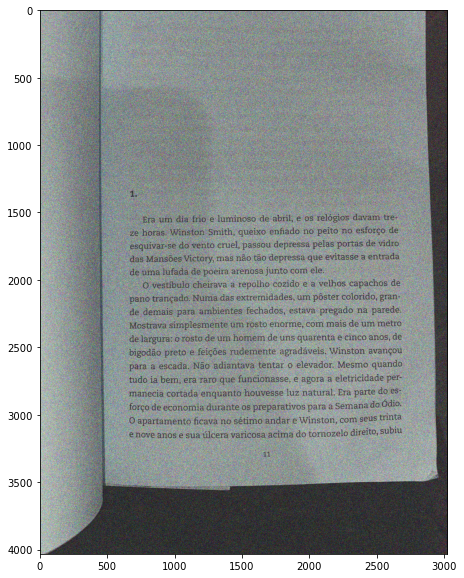

In [3]:
raw = read_image(file = 'book_70')
show(raw)

### Processing

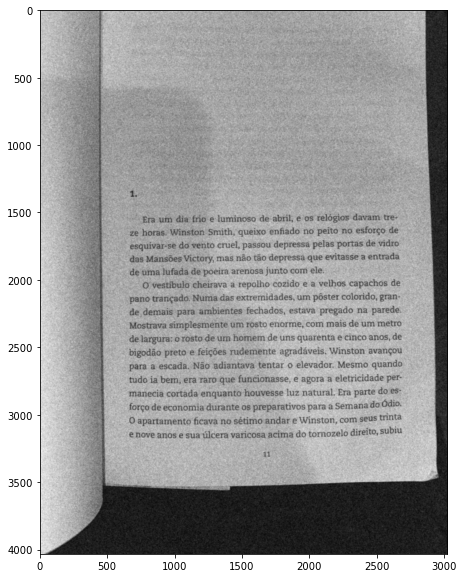

In [4]:
grey = get_greyscale(raw)
norm = normalize(grey)
gauss = gaussian(norm, 15, 15)


show(gauss)

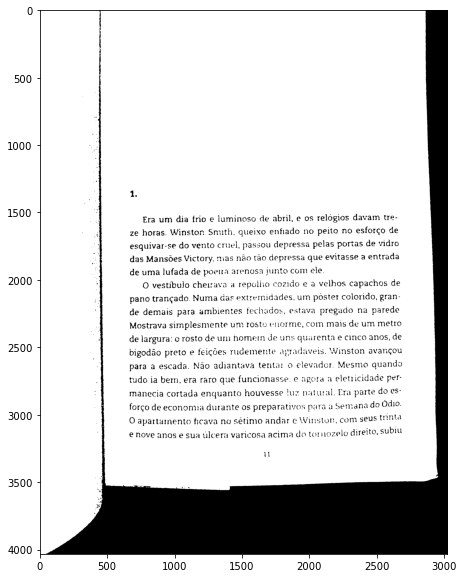

In [5]:
show(thresholding(gauss))

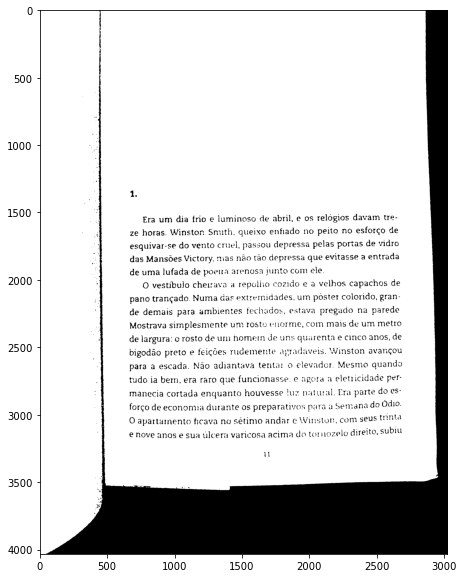

In [6]:
thres = thresholding(gauss)
#thres = gaussian_thresholding(grey)

show(thres)

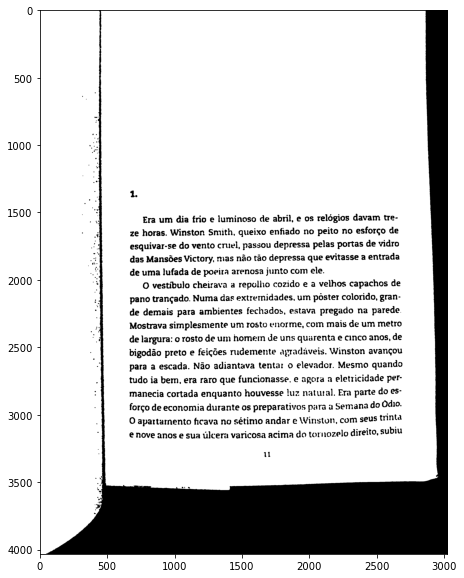

In [7]:
#processed = erode(thres, iterations=2)
processed = thres
#processed = dilate(processed, iterations=1)
processed = erode(processed, iterations=3)

show(processed)

## Character Segmentation

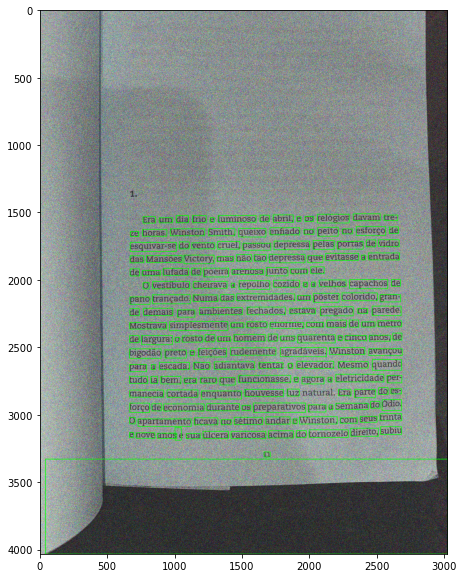

In [8]:
show(get_word_boxes(processed.copy(), (0, 255, 0), raw=raw.copy()))

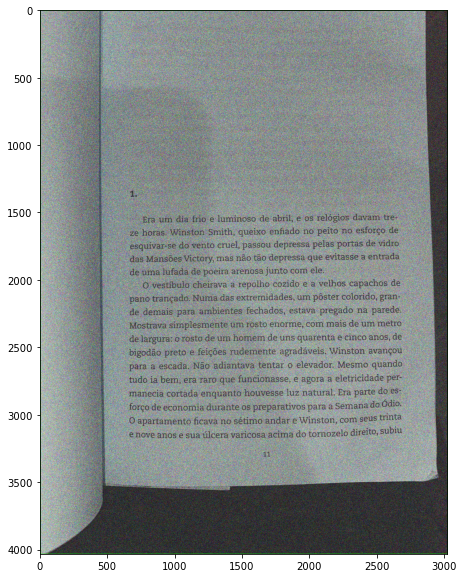

In [9]:
show(get_word_boxes(raw.copy(), (0,255,0)))

In [10]:
img_dict = get_data(processed)
segments = list()
segments_txt = list()

for i in range(len(img_dict['text'])):
    (x, y, w, h) = (img_dict['left'][i], img_dict['top'][i], img_dict['width'][i], img_dict['height'][i])
    crop_img = processed[y:y+h, x:x+w]
    if img_dict['level'][i] == 3:
        segments.append(crop_img)
        #show(crop_img)
        #print(img_dict['text'][i])
        segment_txt = ocr(crop_img)
        segments_txt.append(segment_txt)
        #print(segment_txt)


## OCRing

In [11]:
raw_text = ocr(raw)
processed_text = ocr(processed)
segmented_text = ' '.join(segments_txt)

In [12]:
print(raw_text)

In [13]:
print(processed_text)

Era um dia frio e luminoso de abril, e os relógios davam tre-
ze horas. Winston Smith, queixo enfiado no peito no esforço de
esquivar-se do vento cruel, passou depressa pelas portas de vidro
das Mansões Victory, mas não tão depressa que evitasse a entrada
de uma lufada de poeira arenosa junto com ele.

O vestíbulo cheirava a repolho cozido e a velhos capachos de
pano trançado. Numa das extremidades, um poster colorido, gran-
de demais para ambientes fechados, estava pregado na parede.
Mostrava simplesmente um rosto enorme, com mais de um metro
de largura: o rosto de um homem de uns quarenta e cinco anos, de
bigodão preto e feições rudemente agradáveis. Winston avançou
para a escada. Não adiantava tentar o elevador. Mesmo quando
tudo ia bem, era raro que funcionasse. e apora a eletricidade per-
manecia cortada enquanto houvesse luz natural. Era parte do es-
forço de economia durante os preparativos para u Semana do Ódio.
O apartamento ficava no sétimo andar e Winston, com seus trinta
e 

In [14]:
print(segmented_text)

Era um dia frio e luminoso de abril, e os relógios davam tre-
ze horas. Winston Smith, queixo enfiado no peito no esforço de
esquivar-se do vento cruel, passou depressa pelas portas de vidro
das Mansões Victory, mas não tão depressa que evitasse a entrada
de uma lufada de poeira arenosa junto com ele.
 O vestíbulo cheirava a repolho cozido e a velhos capachos de
pano trançado. Numa das extremidades, um poster colorido, gran-
de demais para ambientes fechados, estava pregado na parede.
Mostrava simplesmente um rosto enorme, com mais de um metro
de largura: o rosto de um homem de uns quarenta e cinco anos, de
bigodão preto e feições rudemente agradáveis. Winston avançou
para a escada. Não adiantava tentar o elevador. Mesmo quando
tudo ia bem, era raro que funcionasse. e apora a eletricidade per-
manecia cortada enquanto houvesse luz natutal. Era parte do es
forço de economia durante os preparativos para a Semana do Ódio.
O apartamento ficava no sétimo andar e Winston, com seus tinta
e n

## Postprocessing

### Raw image text

In [15]:
raw_text_pp = remove_double_spaces(' '.join(remove_special(raw_text)))
raw_text_pp = remove_single_letters(raw_text_pp, keep_e=True, keep_a=True)
print(raw_text_pp)

### Processed image text

In [16]:
processed_text_pp = remove_double_spaces(' '.join(remove_special(processed_text, keep_dot_comma=True)))
processed_text_pp = remove_single_letters(processed_text_pp, keep_e=True, keep_a=True, keep_o=True)
print(processed_text_pp)

Era um dia frio e luminoso de abril, e os relógios davam tre ze horas. Winston Smith, queixo enfiado no peito no esforço de esquivarse do vento cruel, passou depressa pelas portas de vidro das Mansões Victory, mas não tão depressa que evitasse a entrada de uma lufada de poeira arenosa junto com ele. O vestíbulo cheirava a repolho cozido e a velhos capachos de pano trançado. Numa das extremidades, um poster colorido, gran de demais para ambientes fechados, estava pregado na parede. Mostrava simplesmente um rosto enorme, com mais de um metro de largura o rosto de um homem de uns quarenta e cinco anos, de bigodão preto e feições rudemente agradáveis. Winston avançou para a escada. Não adiantava tentar o elevador. Mesmo quando tudo ia bem, era raro que funcionasse. e apora a eletricidade per manecia cortada enquanto houvesse luz natural. Era parte do es forço de economia durante os preparativos para  Semana do Ódio. O apartamento ficava no sétimo andar e Winston, com seus trinta e nove ano

### Processed and Segmented image text

In [17]:
segmented_text = remove_breaks(segmented_text, add_space=True)
segmented_text = remove_double_spaces(segmented_text)
segmented_text = remove_single_letters(segmented_text)
segmented_text = remove_special(segmented_text)
print(segmented_text)

['Era um dia frio luminoso de abril os relógios davam tre ze horas Winston Smith queixo enfiado no peito no esforço de esquivarse do vento cruel passou depressa pelas portas de vidro das Mansões Victory mas não tão depressa que evitasse entrada de uma lufada de poeira arenosa junto com ele vestíbulo cheirava repolho cozido velhos capachos de pano trançado Numa das extremidades um poster colorido gran de demais para ambientes fechados estava pregado na parede Mostrava simplesmente um rosto enorme com mais de um metro de largura rosto de um homem de uns quarenta cinco anos de bigodão preto feições rudemente agradáveis Winston avançou para escada Não adiantava tentar elevador Mesmo quando tudo ia bem era raro que funcionasse apora eletricidade per manecia cortada enquanto houvesse luz natutal Era parte do es forço de economia durante os preparativos para Semana do Ódio apartamento ficava no sétimo andar Winston com seus tinta nove anos sua úlcera varicosa acima do tornozelo direito subiu 